# seaborn.jointplot
---
Seaborn's `jointplot` displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps [JointGrid](http://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid).


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

The multivariate normal distribution is a nice tool to demonstrate this type of plot as it is sampling from a multidimensional Gaussian and there is natural clustering. I'll set the covariance matrix equal to the identity so that the X and Y variables are uncorrelated -- meaning we will just get a blob

In [2]:
# Generate some random multivariate data
x, y = np.random.RandomState(8).multivariate_normal([0, 0], [(1, 0), (0, 1)], 1000).T
df = pd.DataFrame({"x":x,"y":y})


Default plot

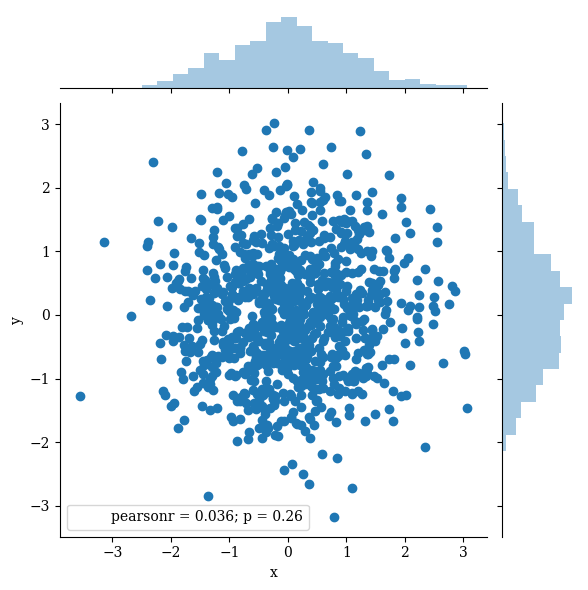

In [3]:
p = sns.jointplot(data=df,x='x', y='y')

Currently, `jointplot` wraps `JointGrid` with the following options for `kind`:  
    - scatter
    - reg
    - resid 
    - kde 
    - hex 

Scatter is the default parameters

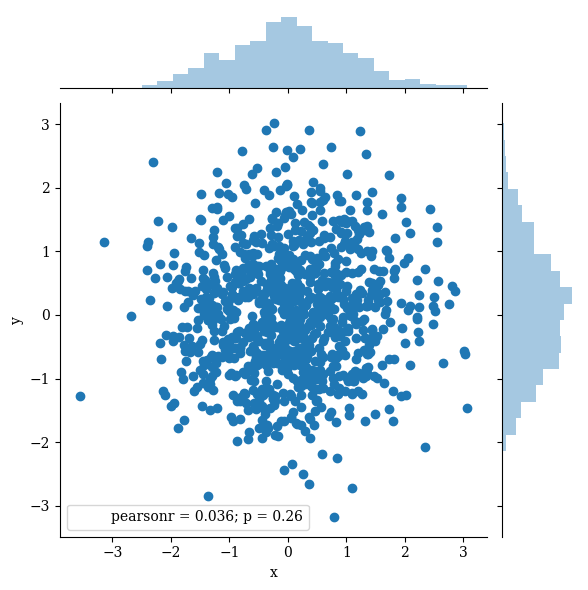

In [4]:
p = sns.jointplot(data=df,x='x', y='y',kind='scatter')

'reg' plots a linear regression line. Here the line is close to flat because we chose our variables to be uncorrelated

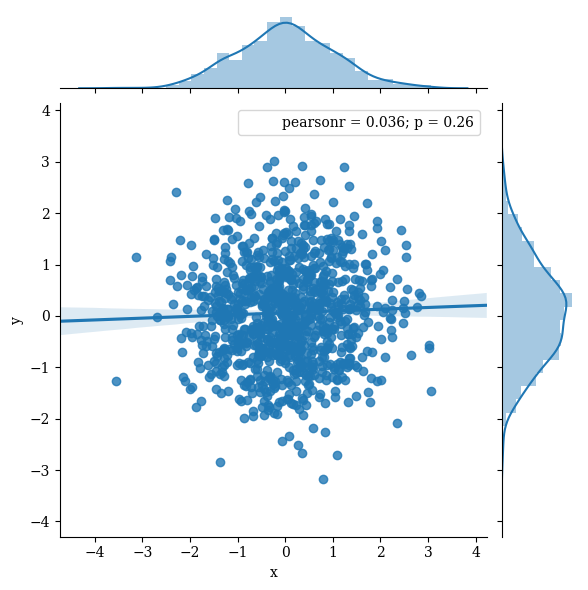

In [5]:
p = sns.jointplot(data=df,x='x', y='y',kind='reg')

'resid' plots the residual of the data to the regression line -- which is not very useful for this specific example because our regression line is almost flat and thus the residual is almost the same as the data.

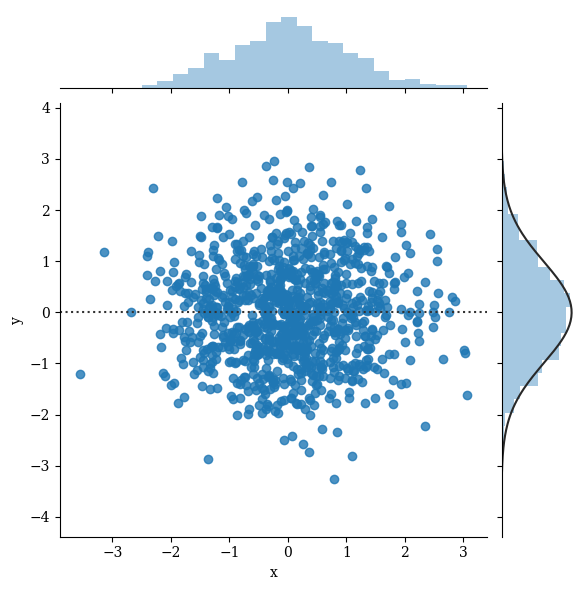

In [6]:
x2, y2 = np.random.RandomState(9).multivariate_normal([0, 0], [(1, 0), (0, 1)], len(x)).T
df2 = pd.DataFrame({"x":x,"y":y2})

p = sns.jointplot(data=df,x='x', y='y',kind='resid')

`kde` plots a kernel density estimate in the margins and converts the interior into a shaded countour plot

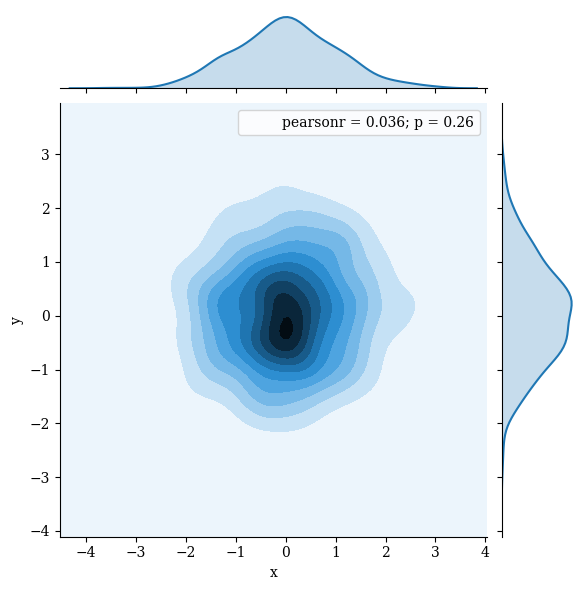

In [7]:
p = sns.jointplot(data=df,x='x', y='y',kind='kde')

'hex' bins the data into hexagons with histograms in the margins. At this point you probably see the "pre-cooked" nature of `jointplot`. It provides nice defaults, but if you wanted, for example, a KDE on the margin of this hexplot you will need to use `JointGrid`.

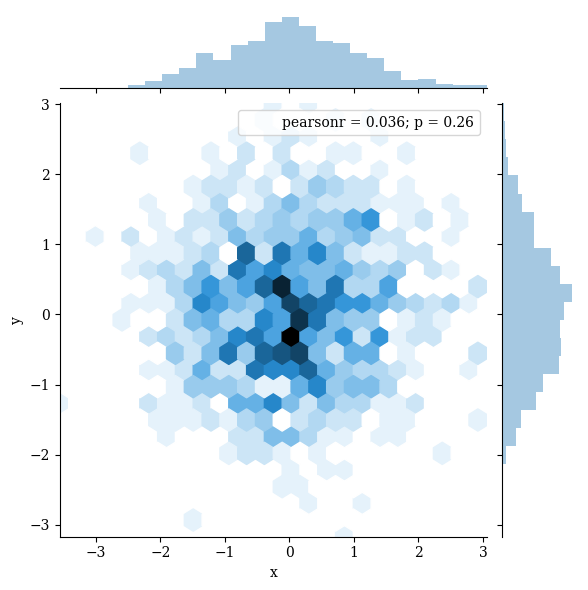

In [8]:
p = sns.jointplot(data=df,x='x', y='y',kind='hex')

`stat_func` can be used to provide a function for computing a summary statistic from the data. The full x, y data vectors are passed in, so the function must provide one value or a tuple from many. As an example, I'll provide `tmin`, which when used in this way will return the smallest value of x that was greater than its corresponding value of y.

-1.37265900987


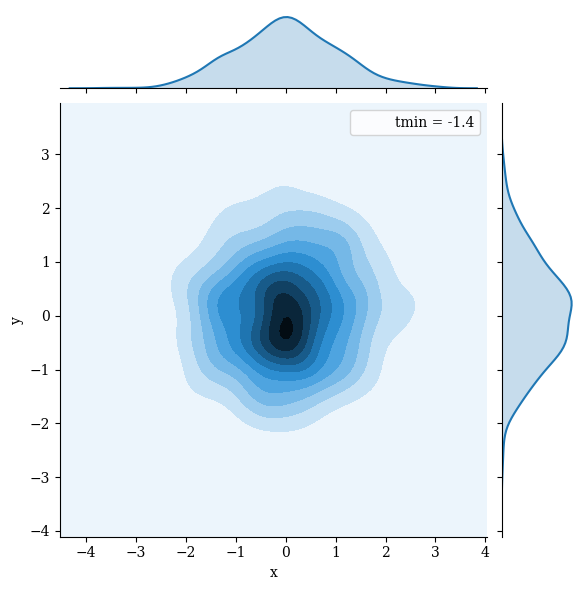

In [9]:
from scipy.stats import tmin
p = sns.jointplot(data=df, x='x', y='y',kind='kde',stat_func=tmin)

# tmin is computing roughly the equivalent of the following
print(df.loc[df.x>df.y,'x'].min())

Change the color

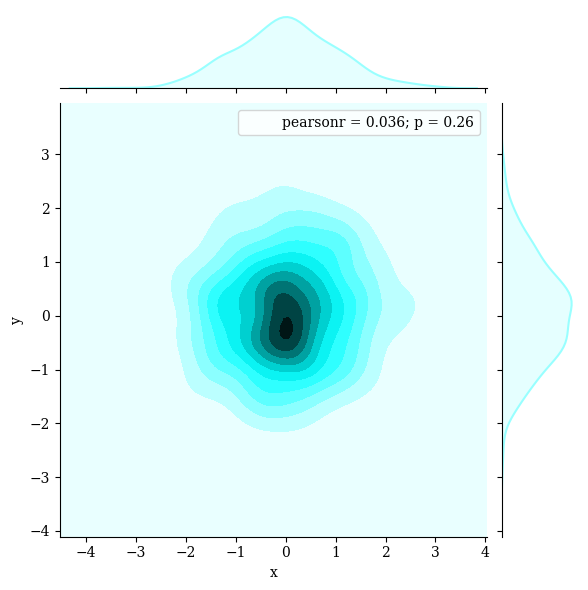

In [10]:
p = sns.jointplot(data=df,
                  x='x',
                  y='y',
                  kind='kde',
                  color="#99ffff")

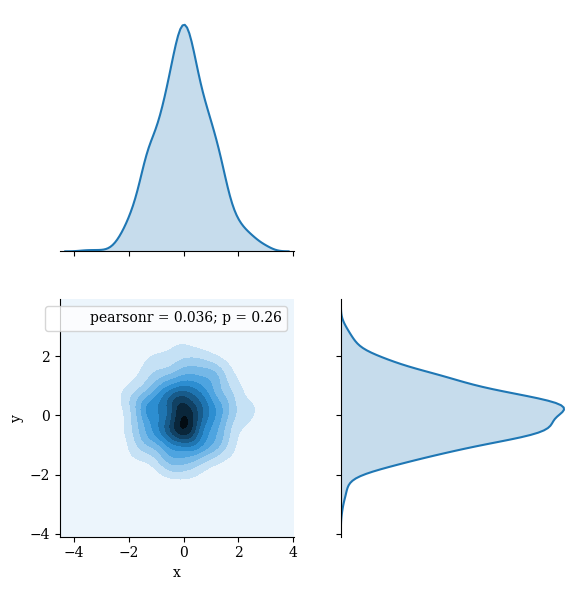

In [11]:
p = sns.jointplot(data=df,
                  x='x',
                  y='y',
                  kind='kde',
                  ratio=1)

Create separation between 2D plot and marginal plots with `space`

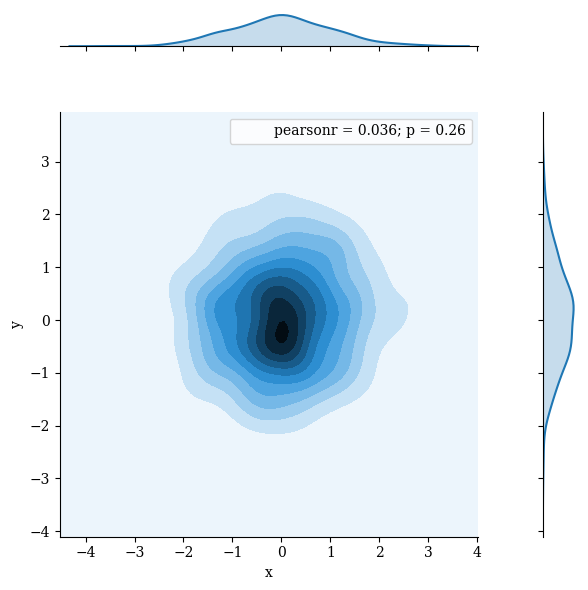

In [12]:
p = sns.jointplot(data=df,
                  x='x',
                  y='y',
                  kind='kde',
                  space=2)

`xlim` and `ylim` can be used to adjust the field of view

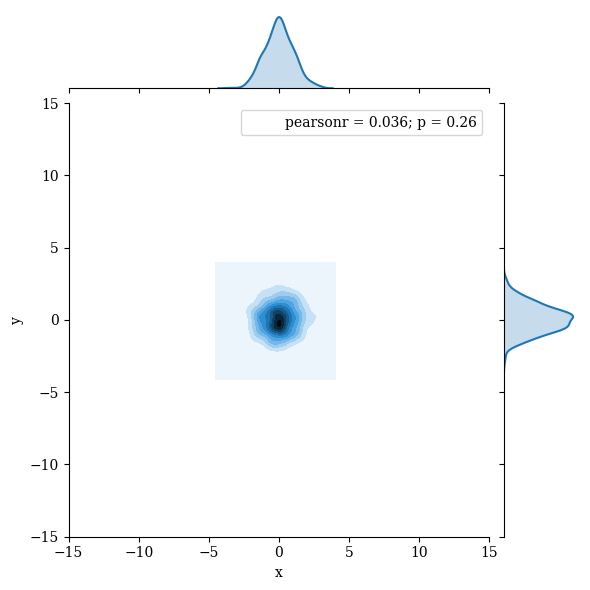

In [13]:
p = sns.jointplot(data=df,
                  x='x',
                  y='y',
                  kind='kde',
                  xlim=(-15,15),
                  ylim=(-15,15))

Pass additional parameters to the marginal plots with `marginal_kws`. You can pass similar options to `joint_kws` and `annot_kws`

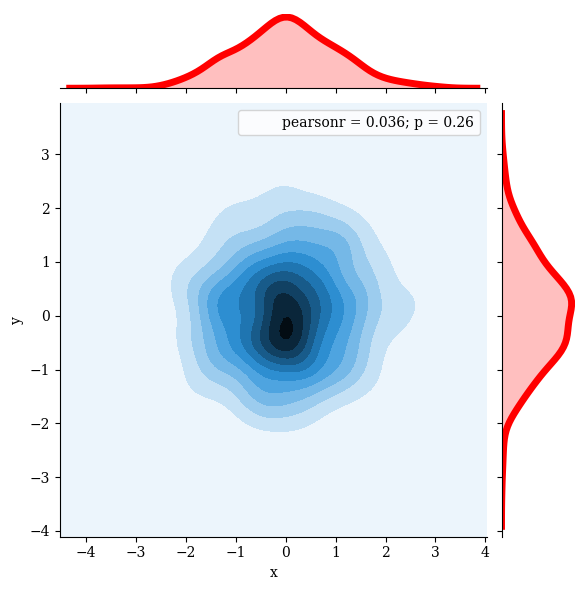

In [14]:
p = sns.jointplot(data=df,
                  x='x',
                  y='y',
                  kind='kde',
                  marginal_kws={'lw':5,
                                'color':'red'})


Finalize

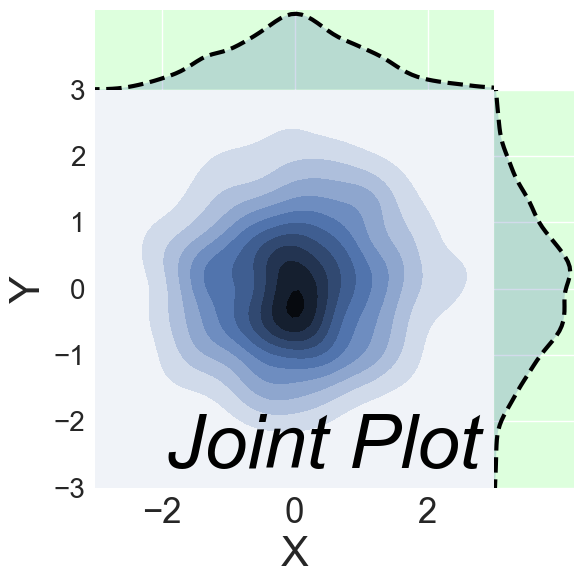

In [15]:
sns.set(rc={'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

from itertools import chain
p = sns.jointplot(data=df,
                  x='x',
                  y='y',
                  kind='kde',
                  xlim=(-3,3),
                  ylim=(-3,3),
                  space=0,
                  stat_func=None,
                  marginal_kws={'lw':3,
                                'bw':0.2}).set_axis_labels('X','Y')
p.ax_marg_x.set_facecolor('#ccffccaa')
p.ax_marg_y.set_facecolor('#ccffccaa')
for l in chain(p.ax_marg_x.axes.lines,p.ax_marg_y.axes.lines):
    l.set_linestyle('--')
    l.set_color('black')
plt.text(-1.7,-2.7, "Joint Plot", fontsize = 55, color='Black', fontstyle='italic')

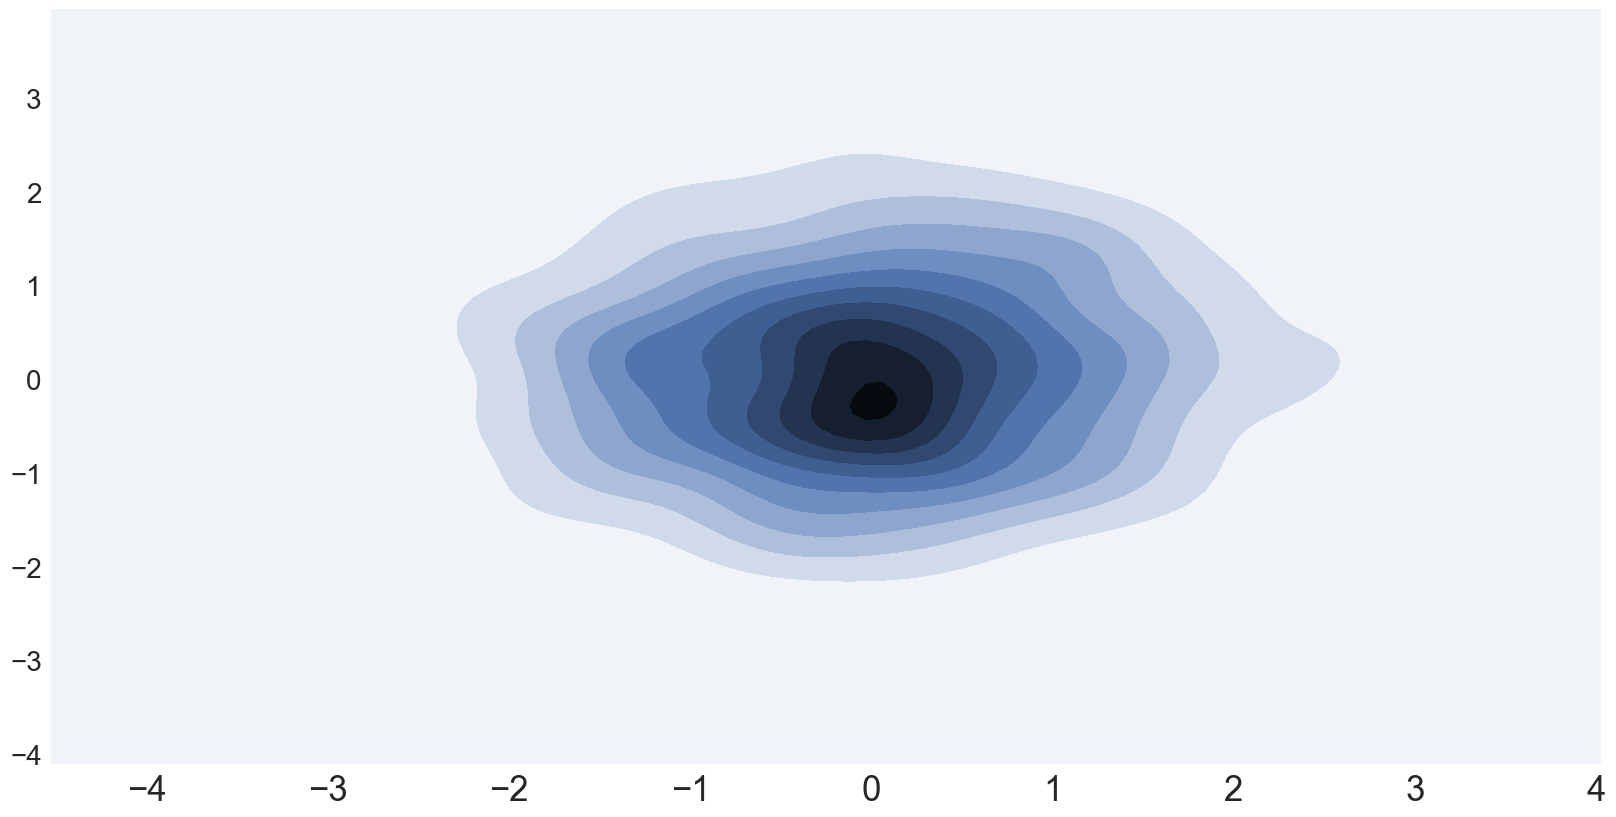

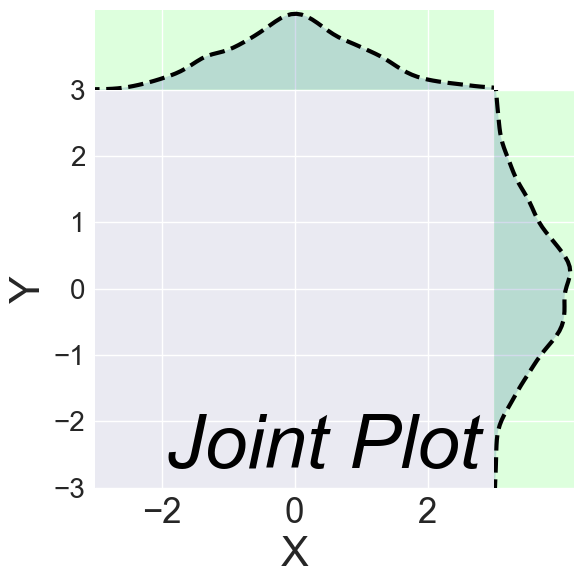

In [25]:
fig, ax = plt.subplots(1,1)
sns.set(rc={'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

from itertools import chain
p = sns.jointplot(data=df,
                  x='x',
                  y='y',
                  kind='kde',
                  xlim=(-3,3),
                  ylim=(-3,3),
                  space=0,
                  stat_func=None,
                  ax=ax,
                  marginal_kws={'lw':3,
                                'bw':0.2}).set_axis_labels('X','Y')
p.ax_marg_x.set_facecolor('#ccffccaa')
p.ax_marg_y.set_facecolor('#ccffccaa')
for l in chain(p.ax_marg_x.axes.lines,p.ax_marg_y.axes.lines):
    l.set_linestyle('--')
    l.set_color('black')
plt.text(-1.7,-2.7, "Joint Plot", fontsize = 55, color='Black', fontstyle='italic')

# p = sns.jointplot(data=df,
#                   x='x',
#                   y='y',
#                   kind='kde',
#                   xlim=(-3,3),
#                   ylim=(-3,3),
#                   space=0,
#                   stat_func=None,
#                   ax=ax[1],
#                   marginal_kws={'lw':3,
#                                 'bw':0.2}).set_axis_labels('X','Y')
# p.ax_marg_x.set_facecolor('#ccffccaa')
# p.ax_marg_y.set_facecolor('#ccffccaa')
# for l in chain(p.ax_marg_x.axes.lines,p.ax_marg_y.axes.lines):
#     l.set_linestyle('--')
#     l.set_color('black')


In [16]:
p.savefig('../../figures/jointplot.png')